# The easiest way to download YouTube videos using Python

For an article accompanying this Notebook, please go [here](https://towardsdatascience.com/the-easiest-way-to-download-youtube-videos-using-python-2640958318ab).

## Setup

In [1]:
from pytube import YouTube

# misc
import os
import shutil
import math
import datetime

# plots
import matplotlib.pyplot as plt
%matplotlib inline

# image operation
import cv2

## Downloading a video

In [3]:
# create the instance of the YouTube class
video = YouTube('https://www.youtube.com/watch?v=NqC_1GuY3dw')

In [17]:
# print a summary of the selected video
print('Summary:')
print(f'Title: {video.title}')
print(f'Duration: {video.length / 60:.2f} minutes')
print(f'Rating: {video.rating:.2f}')
print(f'# of views: {video.views}')

Summary:
Title: Game Boy Longplay [009] Mega Man: Dr. Wily's Revenge
Duration: 39.80 minutes
Rating: 4.87
# of views: 164106


In [7]:
# display all streams
video.streams.all()

[<Stream: itag="18" mime_type="video/mp4" res="360p" fps="30fps" vcodec="avc1.42001E" acodec="mp4a.40.2" progressive="True" type="video">,
 <Stream: itag="133" mime_type="video/mp4" res="240p" fps="30fps" vcodec="avc1.4d400d" progressive="False" type="video">,
 <Stream: itag="242" mime_type="video/webm" res="240p" fps="30fps" vcodec="vp9" progressive="False" type="video">,
 <Stream: itag="160" mime_type="video/mp4" res="144p" fps="30fps" vcodec="avc1.4d400c" progressive="False" type="video">,
 <Stream: itag="278" mime_type="video/webm" res="144p" fps="30fps" vcodec="vp9" progressive="False" type="video">,
 <Stream: itag="140" mime_type="audio/mp4" abr="128kbps" acodec="mp4a.40.2" progressive="False" type="audio">,
 <Stream: itag="251" mime_type="audio/webm" abr="160kbps" acodec="opus" progressive="False" type="audio">]

In [11]:
# display only the streams with the selected file format 
video.streams.filter(file_extension = "mp4").all()

[<Stream: itag="18" mime_type="video/mp4" res="360p" fps="30fps" vcodec="avc1.42001E" acodec="mp4a.40.2" progressive="True" type="video">,
 <Stream: itag="133" mime_type="video/mp4" res="240p" fps="30fps" vcodec="avc1.4d400d" progressive="False" type="video">,
 <Stream: itag="160" mime_type="video/mp4" res="144p" fps="30fps" vcodec="avc1.4d400c" progressive="False" type="video">,
 <Stream: itag="140" mime_type="audio/mp4" abr="128kbps" acodec="mp4a.40.2" progressive="False" type="audio">]

In [9]:
# download the selected video
video.streams.get_by_itag(18).download()

'/Users/eryklewinson/Eryk_private_stuff/Git/medium_articles/Game Boy Longplay [009] Mega Man Dr Wilys Revenge.mp4'

## Extract frames from the video 

In [2]:
class FrameExtractor():
    '''
    Class used for extracting frames from a video file.
    '''
    def __init__(self, video_path):
        self.video_path = video_path
        self.vid_cap = cv2.VideoCapture(video_path)
        self.n_frames = int(self.vid_cap.get(cv2.CAP_PROP_FRAME_COUNT))
        self.fps = int(self.vid_cap.get(cv2.CAP_PROP_FPS))
        
    def get_video_duration(self):
        '''Method for printing the video's duration'''
        duration = self.n_frames/self.fps
        print(f'Duration: {datetime.timedelta(seconds=duration)}')
        
    def get_n_images(self, every_x_frame):
        '''
        Method for calculating the expected number of images to save given 
        we save every x-th frame
        
        Parameters
        ----------
        
        every_x_frame : int
            Indicates we want to look at every x-th frame
        '''
        n_images = math.floor(self.n_frames / every_x_frame) + 1
        print(f'Extracting every {every_x_frame} (nd/rd/th) frame would result in {n_images} images.')
        
    def extract_frames(self, every_x_frame, img_name, dest_path=None, img_ext = '.jpg'):
        '''
        Method used for extracting the frames from images
        
        Parameters
        ----------
        
        every_x_frame : int
            Indicates we want to extract every x-th frame
        img_name : str
            The image name, numbers will be appended (after an underscore) at the end
        dest_path : str
            The path where to store the images. Default (None) saves the images to current directory.
        img_ext : str
            Indicates the desired extension of the image. Default is JPG
        '''
        if not self.vid_cap.isOpened():
            self.vid_cap = cv2.VideoCapture(self.video_path)
        
        if dest_path is None:
            dest_path = os.getcwd()
        else:
            if not os.path.isdir(dest_path):
                os.mkdir(dest_path)
                print(f'Created the following directory: {dest_path}')
        
        frame_cnt = 0
        img_cnt = 0

        while self.vid_cap.isOpened():
            
            success,image = self.vid_cap.read() 
            
            if not success:
                break
            
            if frame_cnt % every_x_frame == 0:
                img_path = os.path.join(dest_path, ''.join([img_name, '_', str(img_cnt), img_ext]))
                cv2.imwrite(img_path, image)  
                img_cnt += 1
                
            frame_cnt += 1
        
        self.vid_cap.release()
        cv2.destroyAllWindows()

In [3]:
# instantiate the class using the downloaded video
fe = FrameExtractor('Game Boy Longplay [009] Mega Man Dr Wilys Revenge.mp4')

In [4]:
# print the number of frames in the video
fe.n_frames

71650

In [5]:
# print the video's duration
fe.get_video_duration()

Duration: 0:39:48.333333


In [6]:
# calculate the potential number of frames 
fe.get_n_images(every_x_frame=1000)

Extracting every 1000 (nd/rd/th) frame would result in 71 images.


In [7]:
# extract every 1000th frame
fe.extract_frames(every_x_frame=1000, 
                  img_name='megaman', 
                  dest_path='megaman_images')

Created the following directory: megaman_images


## Display test image

In [8]:
# define a function for viewing images and test it
def show_image(path):
    image = cv2.imread(path)
    plt.imshow(image)
    plt.show()

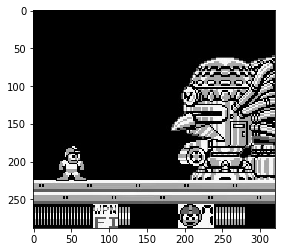

In [10]:
show_image('megaman_images/megaman_61.jpg')